# Garbage Classification

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.signal as signalpy
import tensorflow as tf
from PIL import Image
import keras_tuner as kt
import kagglehub
import shutil

c:\Users\Ema\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Useful Functions

In [2]:
def count_images_in_folder(folder_path, image_extensions=(".jpg", ".jpeg", ".png", ".gif", ".bmp")):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(image_extensions):  # Check for valid image extensions
            count += 1
    return count

def count_jpg_images_in_folder(folder_path, image_extensions=(".jpg")):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(image_extensions):  # Check for valid image extensions
            count += 1
    return count

def load_image_and_label(image_path , label) :
    image_string = tf.io.read_file(image_path)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    image_decoded.set_shape([224, 224, 3])   
    return image_decoded, label

## Data Preprocessing

### Download the datasets and move them to the repo folder

In [3]:
# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# kaggle_default_dataset_1_path = kagglehub.dataset_download("farzadnekouei/trash-type-image-dataset")
# print("Path to dataset 1 files :", kaggle_default_dataset_1_path)
# kaggle_default_dataset_2_path = kagglehub.dataset_download("mostafaabla/garbage-classification")
# print("Path to dataset 2 files :", kaggle_default_dataset_2_path)

In [4]:
# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# kaggle_default_dataset_1_waste_categories_path = os.path.join(kaggle_default_dataset_1_path, 'TrashType_Image_Dataset')
# kaggle_default_dataset_2_waste_categories_path = os.path.join(kaggle_default_dataset_2_path, 'garbage_classification')

In [5]:
dataset_parent_folder_path = os.path.join(os.getcwd(),'Dataset')
dataset_1_path = os.path.join(dataset_parent_folder_path, 'Dataset 1')
dataset_2_path = os.path.join(dataset_parent_folder_path, 'Dataset 2')
os.makedirs(dataset_parent_folder_path, exist_ok=True)
os.makedirs(dataset_1_path, exist_ok=True)
os.makedirs(dataset_2_path, exist_ok=True)

In [6]:
# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# shutil.copytree(kaggle_default_dataset_1_waste_categories_path, dataset_1_path, dirs_exist_ok=True)
# shutil.rmtree(kaggle_default_dataset_1_path)
# shutil.copytree(kaggle_default_dataset_2_waste_categories_path, dataset_2_path, dirs_exist_ok=True)
# shutil.rmtree(kaggle_default_dataset_2_path)

### Give a generic structure to the dataset

Waste Types Folders :
1. general_waste
2. paper_waste
3. plastic_waste
4. metal_waste
5. textile_waste
6. electronic_waste
7. glass_waste

#### Dataset 1 modifications

In [7]:
# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# if os.path.exists(os.path.join(dataset_1_path, 'glass')) and not os.path.exists(os.path.join(dataset_1_path, 'glass_waste')) :
#     os.replace(os.path.join(dataset_1_path, 'glass'), os.path.join(dataset_1_path, 'glass_waste'))
# if os.path.exists(os.path.join(dataset_1_path, 'metal')) and not os.path.exists(os.path.join(dataset_1_path, 'metal_waste')) :
#     os.rename(os.path.join(dataset_1_path, 'metal'), os.path.join(dataset_1_path, 'metal_waste'))
# if os.path.exists(os.path.join(dataset_1_path, 'paper')) and not os.path.exists(os.path.join(dataset_1_path, 'paper_waste')) :
#     os.rename(os.path.join(dataset_1_path, 'paper'), os.path.join(dataset_1_path, 'paper_waste'))
# if os.path.exists(os.path.join(dataset_1_path, 'plastic')) and not os.path.exists(os.path.join(dataset_1_path, 'plastic_waste')) :
#     os.rename(os.path.join(dataset_1_path, 'plastic'), os.path.join(dataset_1_path, 'plastic_waste'))
# if os.path.exists(os.path.join(dataset_1_path, 'trash')) and not os.path.exists(os.path.join(dataset_1_path, 'general_waste')) :
#     os.rename(os.path.join(dataset_1_path, 'trash'), os.path.join(dataset_1_path, 'general_waste'))

# if os.path.exists(os.path.join(dataset_1_path, 'cardboard')) :
#     shutil.copytree(os.path.join(dataset_1_path, 'cardboard'), os.path.join(dataset_1_path, 'paper_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_1_path, 'cardboard'))

dataset_1_general_waste_path = os.path.join(dataset_1_path, 'general_waste')
dataset_1_glass_waste_path = os.path.join(dataset_1_path, 'glass_waste')
dataset_1_metal_waste_path = os.path.join(dataset_1_path, 'metal_waste')
dataset_1_paper_waste_path = os.path.join(dataset_1_path, 'paper_waste')
dataset_1_plastic_waste_path = os.path.join(dataset_1_path, 'plastic_waste')

#### Dataset 2 modifications

In [8]:
# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# if os.path.exists(os.path.join(dataset_2_path, 'battery')) and not os.path.exists(os.path.join(dataset_2_path, 'electronic_waste')) :
#     os.replace(os.path.join(dataset_2_path, 'battery'), os.path.join(dataset_2_path, 'electronic_waste'))

# if os.path.exists(os.path.join(dataset_2_path, 'trash')) and not os.path.exists(os.path.join(dataset_2_path, 'general_waste')) :
#     os.replace(os.path.join(dataset_2_path, 'trash'), os.path.join(dataset_2_path, 'general_waste'))

# if os.path.exists(os.path.join(dataset_2_path, 'metal')) and not os.path.exists(os.path.join(dataset_2_path, 'metal_waste')) :
#     os.replace(os.path.join(dataset_2_path, 'metal'), os.path.join(dataset_2_path, 'metal_waste'))

# if os.path.exists(os.path.join(dataset_2_path, 'paper')) and not os.path.exists(os.path.join(dataset_2_path, 'paper_waste')) :
#     os.replace(os.path.join(dataset_2_path, 'paper'), os.path.join(dataset_2_path, 'paper_waste'))

# if os.path.exists(os.path.join(dataset_2_path, 'plastic')) and not os.path.exists(os.path.join(dataset_2_path, 'plastic_waste')) :
#     os.replace(os.path.join(dataset_2_path, 'plastic'), os.path.join(dataset_2_path, 'plastic_waste'))

# os.makedirs(os.path.join(dataset_2_path, 'glass_waste'), exist_ok=True)
# os.makedirs(os.path.join(dataset_2_path, 'textile_waste'), exist_ok=True)

# if os.path.exists(os.path.join(dataset_2_path, 'biological')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'biological'), os.path.join(dataset_2_path, 'general_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'biological'))

# if os.path.exists(os.path.join(dataset_2_path, 'brown-glass')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'brown-glass'), os.path.join(dataset_2_path, 'glass_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'brown-glass'))

# if os.path.exists(os.path.join(dataset_2_path, 'green-glass')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'green-glass'), os.path.join(dataset_2_path, 'glass_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'green-glass'))

# if os.path.exists(os.path.join(dataset_2_path, 'white-glass')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'white-glass'), os.path.join(dataset_2_path, 'glass_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'white-glass'))

# if os.path.exists(os.path.join(dataset_2_path, 'shoes')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'shoes'), os.path.join(dataset_2_path, 'textile_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'shoes'))

# if os.path.exists(os.path.join(dataset_2_path, 'clothes')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'clothes'), os.path.join(dataset_2_path, 'textile_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'clothes'))

# if os.path.exists(os.path.join(dataset_2_path, 'cardboard')) :
#     shutil.copytree(os.path.join(dataset_2_path, 'cardboard'), os.path.join(dataset_2_path, 'paper_waste'), dirs_exist_ok=True)
#     shutil.rmtree(os.path.join(dataset_2_path, 'cardboard'))

dataset_2_electronic_waste_path = os.path.join(dataset_2_path, 'electronic_waste')
dataset_2_general_waste_path = os.path.join(dataset_2_path, 'general_waste')
dataset_2_glass_waste_path = os.path.join(dataset_2_path, 'glass_waste')
dataset_2_metal_waste_path = os.path.join(dataset_2_path, 'metal_waste')
dataset_2_paper_waste_path = os.path.join(dataset_2_path, 'paper_waste')
dataset_2_plastic_waste_path = os.path.join(dataset_2_path, 'plastic_waste')
dataset_2_textile_waste_path = os.path.join(dataset_2_path, 'textile_waste')

#### Final Dataset modifications

In [9]:
final_dataset_path = os.path.join(dataset_parent_folder_path, "Final_Dataset")
final_dataset_general_waste_path = os.path.join(final_dataset_path, "general_waste")
final_dataset_paper_waste_path = os.path.join(final_dataset_path, "paper_waste")
final_dataset_plastic_waste_path = os.path.join(final_dataset_path, "plastic_waste")
final_dataset_metal_waste_path = os.path.join(final_dataset_path, "metal_waste")
final_dataset_textile_waste_path = os.path.join(final_dataset_path, "textile_waste")
final_dataset_electronic_waste_path = os.path.join(final_dataset_path, "electronic_waste")
final_dataset_glass_waste_path = os.path.join(final_dataset_path, "glass_waste")
os.makedirs(final_dataset_path, exist_ok=True)
os.makedirs(final_dataset_general_waste_path, exist_ok=True)
os.makedirs(final_dataset_paper_waste_path, exist_ok=True)
os.makedirs(final_dataset_plastic_waste_path, exist_ok=True)
os.makedirs(final_dataset_metal_waste_path, exist_ok=True)
os.makedirs(final_dataset_textile_waste_path, exist_ok=True)
os.makedirs(final_dataset_electronic_waste_path, exist_ok=True)
os.makedirs(final_dataset_glass_waste_path, exist_ok=True)

# UNCOMMENT WHEN SETTING THE DATASET UP FOR THE FIRST TIME

# if os.path.exists(final_dataset_electronic_waste_path) and os.path.exists(dataset_2_electronic_waste_path) :
#     for item in os.listdir(final_dataset_electronic_waste_path) :
#         item_path = os.path.join(final_dataset_electronic_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_2_electronic_waste_path, final_dataset_electronic_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_general_waste_path) and os.path.exists(dataset_1_general_waste_path) and os.path.exists(dataset_2_general_waste_path) :
#     for item in os.listdir(final_dataset_general_waste_path) :
#         item_path = os.path.join(final_dataset_general_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_1_general_waste_path, final_dataset_general_waste_path, dirs_exist_ok=True)
#     shutil.copytree(dataset_2_general_waste_path, final_dataset_general_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_glass_waste_path) and os.path.exists(dataset_1_glass_waste_path) and os.path.exists(dataset_2_glass_waste_path) :
#     for item in os.listdir(final_dataset_glass_waste_path) :
#         item_path = os.path.join(final_dataset_glass_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_1_glass_waste_path, final_dataset_glass_waste_path, dirs_exist_ok=True)
#     shutil.copytree(dataset_2_glass_waste_path, final_dataset_glass_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_metal_waste_path) and os.path.exists(dataset_1_metal_waste_path) and os.path.exists(dataset_2_metal_waste_path) :
#     for item in os.listdir(final_dataset_metal_waste_path) :
#         item_path = os.path.join(final_dataset_metal_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_1_metal_waste_path, final_dataset_metal_waste_path, dirs_exist_ok=True)
#     shutil.copytree(dataset_2_metal_waste_path, final_dataset_metal_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_paper_waste_path) and os.path.exists(dataset_1_paper_waste_path) and os.path.exists(dataset_2_paper_waste_path) :
#     for item in os.listdir(final_dataset_paper_waste_path) :
#         item_path = os.path.join(final_dataset_paper_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_1_paper_waste_path, final_dataset_paper_waste_path, dirs_exist_ok=True)
#     shutil.copytree(dataset_2_paper_waste_path, final_dataset_paper_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_plastic_waste_path) and os.path.exists(dataset_1_plastic_waste_path) and os.path.exists(dataset_2_plastic_waste_path) :
#     for item in os.listdir(final_dataset_plastic_waste_path) :
#         item_path = os.path.join(final_dataset_plastic_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_1_plastic_waste_path, final_dataset_plastic_waste_path, dirs_exist_ok=True)
#     shutil.copytree(dataset_2_plastic_waste_path, final_dataset_plastic_waste_path, dirs_exist_ok=True)

# if os.path.exists(final_dataset_textile_waste_path) and os.path.exists(dataset_2_textile_waste_path) :
#     for item in os.listdir(final_dataset_textile_waste_path) :
#         item_path = os.path.join(final_dataset_textile_waste_path, item)
#         if os.path.isfile(item_path) or os.path.islink(item_path) :
#             os.unlink(item_path)
#         elif os.path.isdir(item_path) :
#             shutil.rmtree(item_path)
#     shutil.copytree(dataset_2_textile_waste_path, final_dataset_textile_waste_path, dirs_exist_ok=True)

#### Waste types data comparison

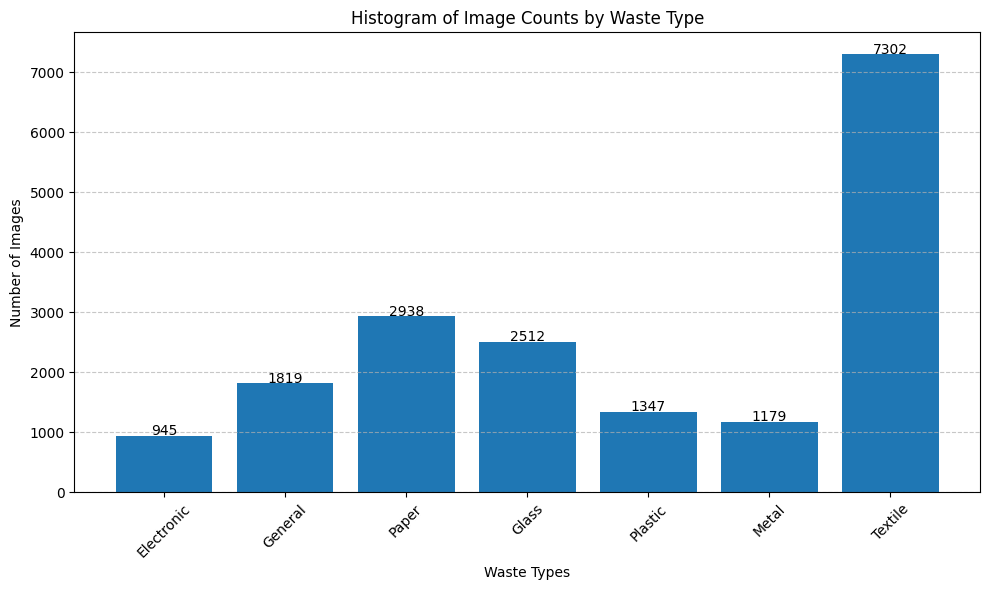

In [10]:
waste_types = ["Electronic", "General", "Paper", "Glass", "Plastic", "Metal", "Textile"]
electronic_waste_image_count = count_images_in_folder(final_dataset_electronic_waste_path)
general_waste_image_count = count_images_in_folder(final_dataset_general_waste_path)
paper_waste_image_count = count_images_in_folder(final_dataset_paper_waste_path)
glass_waste_image_count = count_images_in_folder(final_dataset_glass_waste_path)
plastic_waste_image_count = count_images_in_folder(final_dataset_plastic_waste_path)
metal_waste_image_count = count_images_in_folder(final_dataset_metal_waste_path)
textile_waste_image_count = count_images_in_folder(final_dataset_textile_waste_path)

image_counts = [electronic_waste_image_count, general_waste_image_count, paper_waste_image_count, glass_waste_image_count, plastic_waste_image_count, metal_waste_image_count, textile_waste_image_count]

plt.figure(figsize=(10,6))
bars = plt.bar(waste_types, image_counts)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             str(bar.get_height()), ha='center', fontsize=10)
    
# Adding labels and title
plt.xlabel("Waste Types")
plt.ylabel("Number of Images")
plt.title("Histogram of Image Counts by Waste Type")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

### Prepare the data pipeline using tf.keras.utils.image_dataset_from_directory

Found 18042 files belonging to 7 classes.


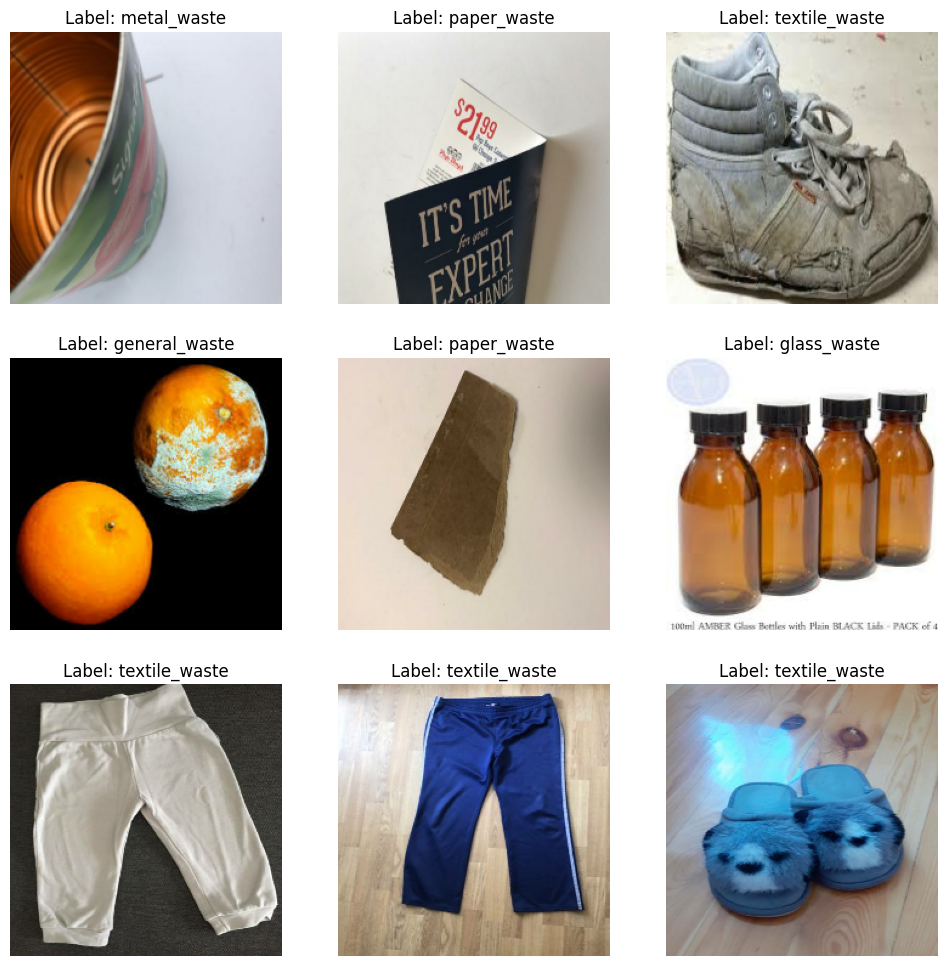

In [11]:
waste_classification_dataset = tf.keras.utils.image_dataset_from_directory(
    final_dataset_path,
    labels='inferred',
    label_mode='categorical',  # For multi-class classification
    batch_size=32,
    image_size=(224, 224),  # ResNet50 input size
    shuffle=True,
    seed=123
)

class_names = waste_classification_dataset.class_names

for images, labels in waste_classification_dataset.take(1):  # Take one batch only
    plt.figure(figsize=(12, 12))
    for i in range(9):  # Show the first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image format
        plt.title(f"Label: {class_names[labels[i].numpy().argmax()]}")  # Display the class index
        plt.axis("off")
    plt.show()


# waste_classification_dataset = waste_classification_dataset.shuffle(len(waste_classification_dataset), seed=100, reshuffle_each_iteration=False)
# waste_classification_dataset = waste_classification_dataset.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### Splitting the dataset

In [12]:
training_dataset_size = int(0.7*len(waste_classification_dataset))
validation_dataset_size = int(0.15*len(waste_classification_dataset))
testing_dataset_size = len(waste_classification_dataset) - training_dataset_size - validation_dataset_size

training_dataset = waste_classification_dataset.take(training_dataset_size)
validation_dataset = waste_classification_dataset.skip(training_dataset_size).take(validation_dataset_size)
testing_dataset = waste_classification_dataset.skip(training_dataset_size+validation_dataset_size).take(testing_dataset_size)

#### Check the first 9 images from the training dataset

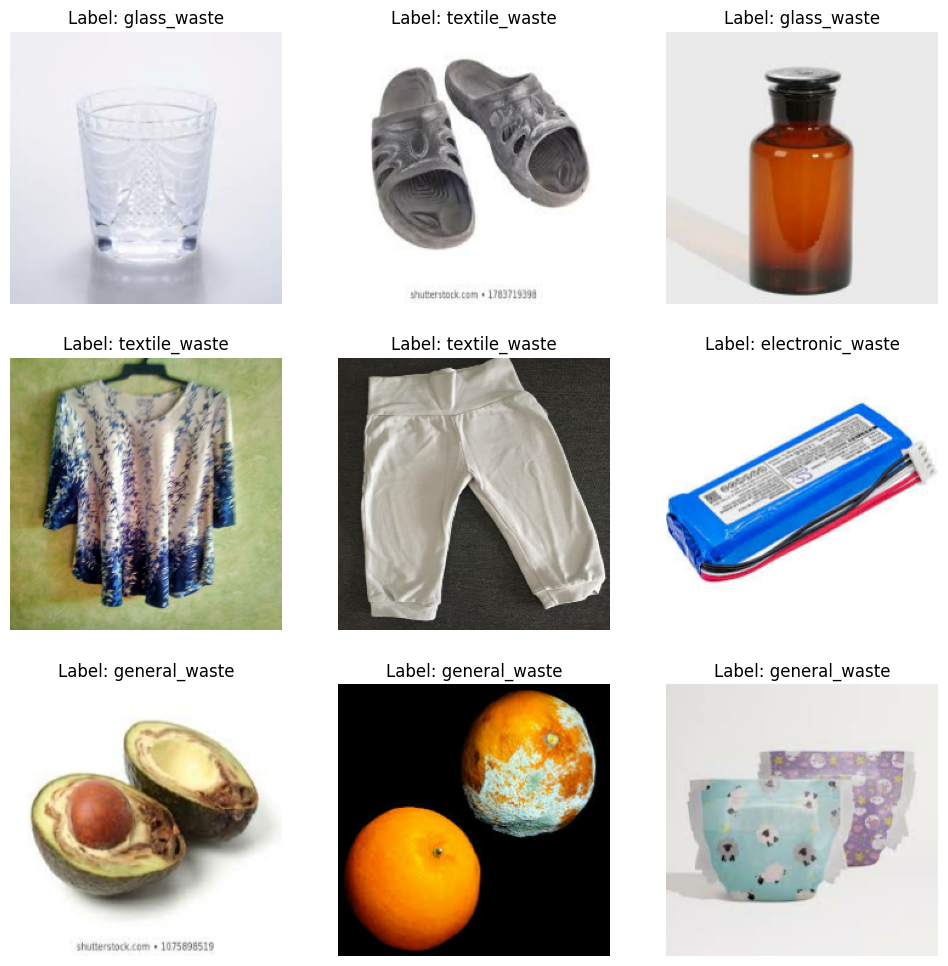

In [13]:
for images, labels in training_dataset.take(1):  # Take one batch only
    plt.figure(figsize=(12, 12))
    for i in range(9):  # Show the first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image format
        plt.title(f"Label: {class_names[labels[i].numpy().argmax()]}")  # Display the class index
        plt.axis("off")
    plt.show()

#### Check the first 9 images from the validation dataset

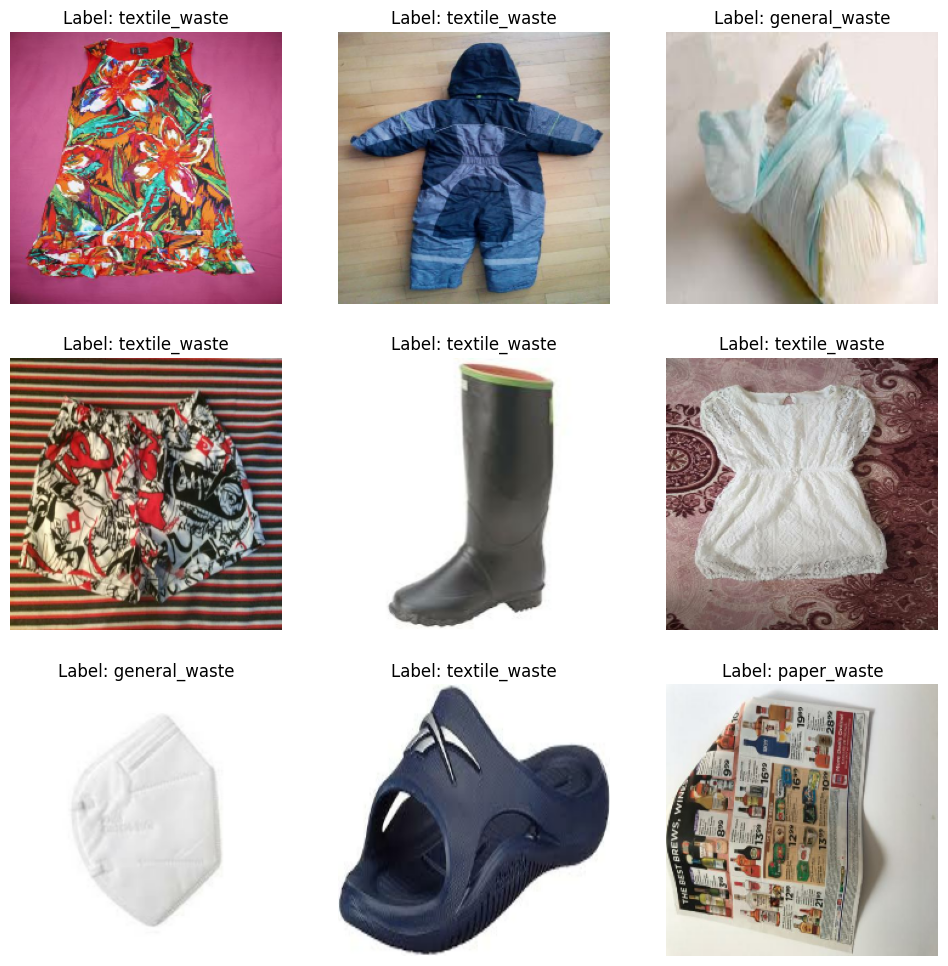

In [14]:
for images, labels in validation_dataset.take(1):  # Take one batch only
    plt.figure(figsize=(12, 12))
    for i in range(9):  # Show the first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image format
        plt.title(f"Label: {class_names[labels[i].numpy().argmax()]}")  # Display the class index
        plt.axis("off")
    plt.show()

#### Check the first 9 images from the testing dataset

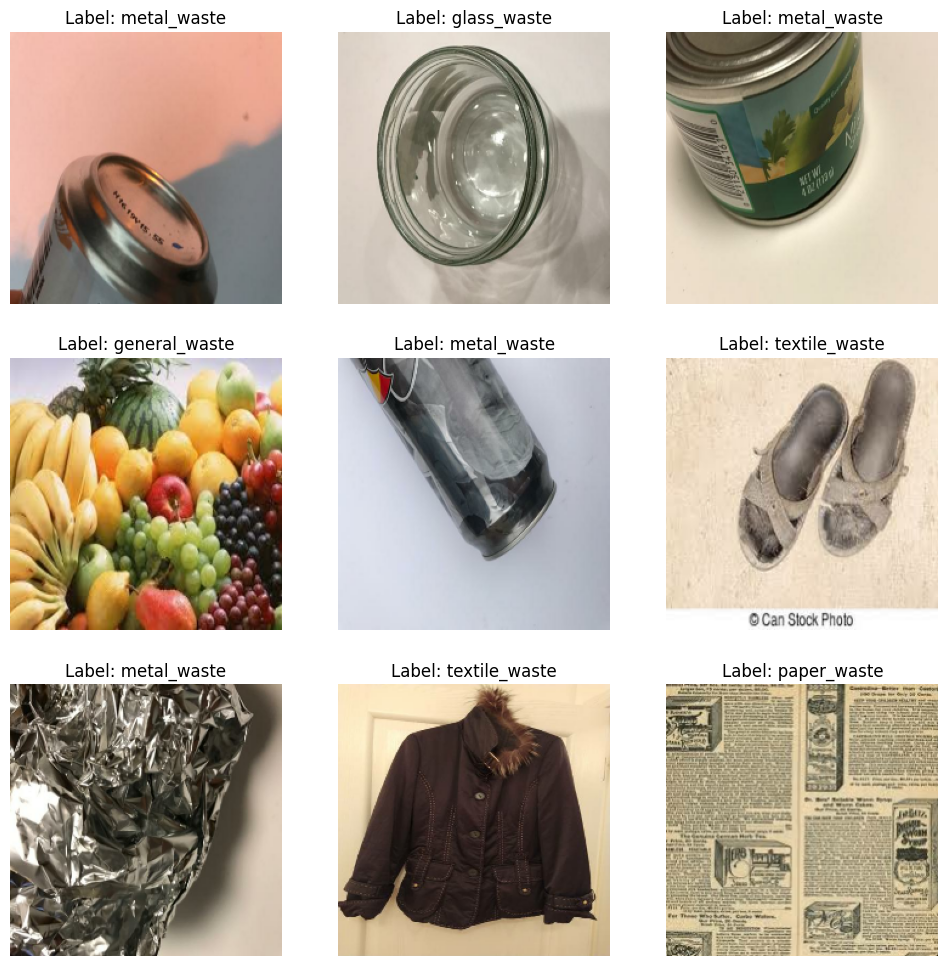

In [15]:
for images, labels in testing_dataset.take(1):  # Take one batch only
    plt.figure(figsize=(12, 12))
    for i in range(9):  # Show the first 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image format
        plt.title(f"Label: {class_names[labels[i].numpy().argmax()]}")  # Display the class index
        plt.axis("off")
    plt.show()

#### Configure the datasets for performance

In [16]:
training_dataset = training_dataset.cache()
validation_dataset = validation_dataset.cache()
testing_dataset = testing_dataset.cache()
training_dataset = training_dataset.prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(tf.data.AUTOTUNE)
testing_dataset = testing_dataset.prefetch(tf.data.AUTOTUNE)

#### Preprocess the datasets for ResNet50

In [17]:
training_dataset = training_dataset.map(lambda x, y: (tf.keras.applications.resnet50.preprocess_input(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (tf.keras.applications.resnet50.preprocess_input(x), y))
testing_dataset = testing_dataset.map(lambda x, y: (tf.keras.applications.resnet50.preprocess_input(x), y))

In [18]:
# Number of batches
print(len(training_dataset))
print(len(validation_dataset))
print(len(testing_dataset))

394
84
86


### Create ResNet base model for feature extraction ignoring the "top" layers used for classification of the ImageNet dataset

In [19]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

##### Add a new classification head for our waste classification problem

In [20]:
waste_classification_resnet50_model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')  # 7 classes
])
waste_classification_resnet50_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [22]:
waste_classification_resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
waste_classification_resnet50_model.fit(training_dataset, epochs=10, validation_data=validation_dataset)

In [ ]:
base_model.trainable = True
waste_classification_resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
waste_classification_resnet50_model.fit(training_dataset, validation_data=validation_dataset, epochs=5)

In [ ]:
waste_classification_resnet50_model.evaluate(testing_dataset)

In [ ]:
waste_classification_resnet50_model.save('waste_classification_resnet50_finetuned_model')

### Prepare the data pipeline. 2nd way. Didn't work

In [ ]:
electronic_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_electronic_waste_path + '/*.jpg')
general_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_general_waste_path + '/*.jpg')
glass_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_glass_waste_path + '/*.jpg')
metal_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_metal_waste_path + '/*.jpg')
paper_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_paper_waste_path + '/*.jpg')
plastic_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_plastic_waste_path + '/*.jpg')
textile_waste_tf_dataset_without_labels = tf.data.Dataset.list_files(final_dataset_textile_waste_path + '/*.jpg')

In [ ]:
print(electronic_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(general_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(glass_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(metal_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(paper_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(plastic_waste_tf_dataset_without_labels.as_numpy_iterator().next())
print(textile_waste_tf_dataset_without_labels.as_numpy_iterator().next())

In [ ]:
electronic_waste_tf_dataset_with_labels = tf.data.Dataset.zip((electronic_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.zeros(len(electronic_waste_tf_dataset_without_labels), dtype=tf.int32))))
general_waste_tf_dataset_with_labels = tf.data.Dataset.zip((general_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.ones(len(general_waste_tf_dataset_without_labels), dtype=tf.int32))))
glass_waste_tf_dataset_with_labels = tf.data.Dataset.zip(glass_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.fill([len(glass_waste_tf_dataset_without_labels)], 2)))
metal_waste_tf_dataset_with_labels = tf.data.Dataset.zip(metal_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.fill([len(metal_waste_tf_dataset_without_labels)], 3)))
paper_waste_tf_dataset_with_labels = tf.data.Dataset.zip(paper_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.fill([len(paper_waste_tf_dataset_without_labels)], 4)))
plastic_waste_tf_dataset_with_labels = tf.data.Dataset.zip(plastic_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.fill([len(plastic_waste_tf_dataset_without_labels)], 5)))
textile_waste_tf_dataset_with_labels = tf.data.Dataset.zip(textile_waste_tf_dataset_without_labels, tf.data.Dataset.from_tensor_slices(tf.fill([len(textile_waste_tf_dataset_without_labels)], 6)))

In [ ]:
print(electronic_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(general_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(glass_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(metal_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(paper_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(plastic_waste_tf_dataset_with_labels.as_numpy_iterator().next())
print(textile_waste_tf_dataset_with_labels.as_numpy_iterator().next())

In [ ]:
waste_classification_dataset = electronic_waste_tf_dataset_with_labels.concatenate(general_waste_tf_dataset_with_labels).concatenate(glass_waste_tf_dataset_with_labels).concatenate(metal_waste_tf_dataset_with_labels).concatenate(paper_waste_tf_dataset_with_labels).concatenate(plastic_waste_tf_dataset_with_labels).concatenate(textile_waste_tf_dataset_with_labels)

In [ ]:
print(waste_classification_dataset.as_numpy_iterator().next())
len(waste_classification_dataset)

##### Shuffling the dataset. Otherwise, the training/testing data will be unbalanced (the labels are in order)

In [ ]:
waste_classification_dataset = waste_classification_dataset.shuffle(len(waste_classification_dataset), seed=100, reshuffle_each_iteration=False)
labels_array = []
for sample, label in waste_classification_dataset.as_numpy_iterator() :
    labels_array.append(label)

print(labels_array)

In [ ]:
training_data = waste_classification_dataset.take(len(waste_classification_dataset)*7//10)
validation_data = waste_classification_dataset.skip(len(training_data)).take(len(waste_classification_dataset)*15//100)
testing_data = waste_classification_dataset.skip(len(training_data)+len(validation_data)).take(len(waste_classification_dataset)-len(training_data)-len(validation_data))

### AR TREBUI SA FOLOSIM tf.keras.applications.resnet.preprocess_input ????

In [ ]:
# ?????

In [ ]:
print(len(training_data))
print(len(validation_data))
print(len(testing_data))

In [ ]:
labels_array = []
for sample, label in training_data.as_numpy_iterator() :
    labels_array.append(label)
print(labels_array)

In [ ]:
labels_array = []
for sample, label in validation_data.as_numpy_iterator() :
    labels_array.append(label)
print(labels_array)

In [ ]:
labels_array = []
for sample, label in testing_data.as_numpy_iterator() :
    labels_array.append(label)
print(labels_array)

In [ ]:
training_data = training_data.map(load_image_and_label)
training_data = training_data.cache()
training_data = training_data.batch(32)
training_data = training_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
testing_data = testing_data.map(load_image_and_label)
testing_data = testing_data.cache()
testing_data = testing_data.batch(32)
testing_data = testing_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
validation_data = validation_data.map(load_image_and_label)
validation_data = validation_data.cache()
validation_data = validation_data.batch(32)
validation_data = validation_data.prefetch(tf.data.AUTOTUNE)

#### Testing one batch of the datasets

In [ ]:
samples , labels = training_data.as_numpy_iterator().next()
print(samples.shape)
print(labels)

In [ ]:
samples , labels = testing_data.as_numpy_iterator().next()
print(samples.shape)
print(labels)

In [ ]:
samples , labels = validation_data.as_numpy_iterator().next()
print(samples.shape)
print(labels)

In [ ]:
samples_shape_array = []
for samples, labels in training_data.as_numpy_iterator() :
    samples_shape_array.append(str(samples.shape))
samples_shape_array